In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Plot the data
for i in range(num_classes):
    plt.plot(t, data[i], label=f'Object {i+1}')
plt.legend()
plt.title('Synthetic Vibration Data')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()

# Import Data

In [37]:
import pandas as pd

df_staple = pd.read_csv('Staple_Augmented_1.csv')
df_pencil_sharpener = pd.read_csv('Pencil_Sharpener_Augmented_1.csv')
df_nothing = pd.read_csv('Nothing_Augmented_1.csv')
df_clip = pd.read_csv('Clip_Augmented_1.csv')

In [38]:
type(df_staple.shape)
type(df_pencil_sharpener.shape)
type(df_nothing.shape)
type(df_clip.shape)

tuple

In [39]:
df_staple

,normalized_x,normalized_y,normalized_z,window_label,Augmentation,Object
0,0.000015,0.000037,-0.000012,1,original,Staple
1,0.000129,0.000361,-0.000116,1,original,Staple
2,0.000569,0.001762,-0.000556,1,original,Staple
3,0.001753,0.005815,-0.001792,1,original,Staple
4,0.004271,0.014786,-0.004460,1,original,Staple
...,...,...,...,...,...,...
11771,0.261389,-0.559087,0.093167,92,scaling,Staple
11772,0.263229,-0.552303,0.086949,92,scaling,Staple
11773,0.262402,-0.546377,0.079385,92,scaling,Staple
11774,0.256715,-0.542296,0.071588,92,scaling,Staple


Group Data by Window Label within Each File:


In [40]:
X_clip = np.row_stack([
        # By indexing with [None], you're using numpy's None indexing feature (also known as np.newaxis), which adds a new axis to an array
        group.drop(columns=['Augmentation','Object','window_label']).values[None] # drop series_id & measurement_number after grouping
        for _, group in df_clip.groupby('window_label')]) # group name, grouped dataframe

X_df_pencil_sharpener = np.row_stack([
        # By indexing with [None], you're using numpy's None indexing feature (also known as np.newaxis), which adds a new axis to an array
        group.drop(columns=['Augmentation','Object','window_label']).values[None] # drop series_id & measurement_number after grouping
        for _, group in df_pencil_sharpener.groupby('window_label')]) # group name, grouped dataframe

X_df_nothing = np.row_stack([
        # By indexing with [None], you're using numpy's None indexing feature (also known as np.newaxis), which adds a new axis to an array
        group.drop(columns=['Augmentation','Object','window_label']).values[None] # drop series_id & measurement_number after grouping
        for _, group in df_nothing.groupby('window_label')]) # group name, grouped dataframe

X_df_staple = np.row_stack([
        # By indexing with [None], you're using numpy's None indexing feature (also known as np.newaxis), which adds a new axis to an array
        group.drop(columns=['Augmentation','Object','window_label']).values[None] # drop series_id & measurement_number after grouping
        for _, group in df_staple.groupby('window_label')]) # group name, grouped dataframe

In [41]:
type(X_clip.shape)
type(X_df_pencil_sharpener.shape)
type(X_df_nothing.shape)
type(X_df_staple.shape)

tuple

In [42]:
print(X_clip.shape)
print(X_df_pencil_sharpener.shape)
print(X_df_nothing.shape)
print(X_df_staple.shape)

(100, 128, 3)
(88, 128, 3)
(96, 128, 3)
(92, 128, 3)


In [43]:
X = np.concatenate([
    X_clip, 
    X_df_pencil_sharpener, 
    X_df_nothing, 
    X_df_staple
], axis=0)

y = np.concatenate([
    np.full(X_clip.shape[0], 0),  # Clip
    np.full(X_df_pencil_sharpener.shape[0], 1),  # Pencil Sharpener
    np.full(X_df_nothing.shape[0], 2),  # Nothing
    np.full(X_df_staple.shape[0], 3)   # Staple
])

In [44]:
X

array([[[-5.92233798e-07, -1.58676054e-04, -4.64868236e-05],
        [-3.62028794e-05, -1.33267920e-03, -4.53922262e-04],
        [-3.16510054e-04, -5.28315466e-03, -2.20218831e-03],
        ...,
        [-2.35505063e-01,  1.45536281e+00, -5.02323715e-01],
        [-2.34752895e-01,  1.45625761e+00, -5.16585433e-01],
        [-2.29617177e-01,  1.45546940e+00, -5.26129910e-01]],

       [[-2.30256381e-02,  4.92214870e-03,  8.63791412e-03],
        [-2.12605732e-02, -2.47521976e-02, -3.75018592e-03],
        [-8.16995393e-03, -1.56517625e-02, -3.07616673e-02],
        ...,
        [-2.33109128e-01,  1.43388638e+00, -5.20248372e-01],
        [-2.32140684e-01,  1.44088648e+00, -5.08174867e-01],
        [-2.26066224e-01,  1.49954089e+00, -5.42919027e-01]],

       [[-1.86031042e-01,  1.44082376e+00, -4.91865985e-01],
        [-1.98162620e-01,  1.44112616e+00, -4.75472340e-01],
        [-2.05434826e-01,  1.44109515e+00, -4.61346247e-01],
        ...,
        [-1.14089536e-01,  1.43702560e+00,

In [45]:
type(X)

numpy.ndarray

In [46]:
print('Shape of X:',X.shape)
print('Shape of y:',y.shape)

Shape of X: (376, 128, 3)
Shape of y: (376,)


Concatenate Groups Across Files by Labels:


### Train test split

In [47]:
from sklearn.model_selection import train_test_split

# Assuming 'fft_data' is your input features and 'labels' is your target output
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (300, 128, 3)
Testing set shape: (76, 128, 3)


# FFT

In [48]:
def prepare_fft_data(data):
    # Compute the FFT along each row (time-series sample)
    fft_data = np.fft.rfft(data, axis=1)
    # Compute magnitude of the FFT
    fft_magnitude = np.abs(fft_data)
    # Normalize the magnitude by the maximum value within each sample
    fft_magnitude = fft_magnitude / np.max(fft_magnitude, axis=1, keepdims=True)
    # Add a channel dimension for CNN compatibility
    # fft_magnitude = fft_magnitude[..., np.newaxis]
    return fft_magnitude

In [49]:
X_train_fft, X_test_fft = prepare_fft_data(X_train), prepare_fft_data(X_test)

print("Shape of X_train_fft:", X_train_fft.shape)
print("Shape of X_test_fft:", X_test_fft.shape)

Shape of X_train_fft: (300, 65, 3)
Shape of X_test_fft: (76, 65, 3)


### Visualisation of FFT

In [50]:
X_train_fft[0,:,0]

array([1.00000000e+00, 2.25453714e-02, 4.76215074e-02, 3.16201960e-02,
       5.03369880e-02, 3.29854431e-02, 8.14815932e-03, 2.94210084e-02,
       1.44194695e-02, 1.57066807e-02, 6.05678144e-03, 9.54679884e-03,
       7.50273179e-03, 6.21217639e-03, 1.88857053e-03, 2.68220476e-03,
       1.50492640e-03, 5.07376040e-03, 1.44766484e-03, 4.03719222e-03,
       2.55278312e-03, 1.01755998e-03, 2.92506287e-03, 2.73733458e-03,
       4.07964780e-03, 1.39491939e-03, 4.43573815e-03, 6.14805762e-03,
       3.28560018e-03, 1.92057758e-03, 2.42538102e-03, 5.55772628e-03,
       7.88698838e-03, 8.85931594e-03, 5.94271891e-03, 1.53878679e-03,
       4.54146537e-03, 4.21167153e-03, 1.92923782e-03, 4.46444745e-03,
       1.11163353e-03, 1.99542848e-03, 3.15540455e-03, 3.61913766e-03,
       1.90966120e-03, 2.12036900e-03, 1.68291651e-03, 4.04059188e-03,
       4.92923234e-03, 4.12828551e-03, 2.54097517e-03, 4.56778233e-03,
       8.32119153e-03, 9.26992342e-04, 3.62599192e-03, 4.63831377e-03,
      

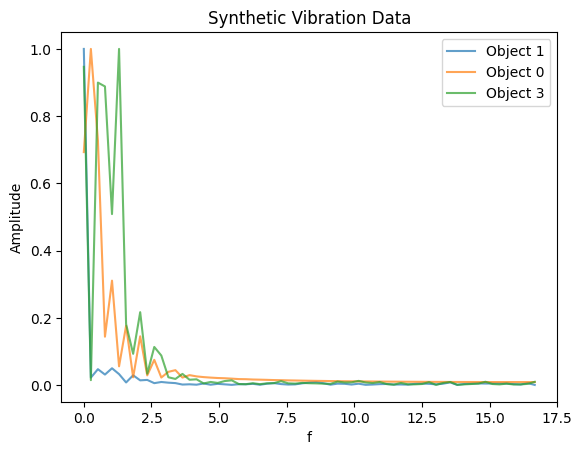

In [51]:
f = np.fft.rfftfreq(X.shape[1], 0.03)

plt.plot(f, X_train_fft[0,:,0].flatten(), label=f'Object {y_train[0]}', alpha = 0.7)
plt.plot(f, X_train_fft[80,:,0].flatten(), label=f'Object {y_train[80]}', alpha = 0.7)
plt.plot(f, X_train_fft[200,:,0].flatten(), label=f'Object {y_train[200]}', alpha = 0.7)

plt.legend()
plt.title('Synthetic Vibration Data')
plt.xlabel('f')
plt.ylabel('Amplitude')
plt.show()

# Model

In [52]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

In [53]:
sample_length = X.shape[1]
num_classes = len(set(y_train))

### Method 1: 1D CNN on Raw Time-Series Data

The architecture for a 1D CNN processing raw time-series data can differ from one processing FFT data primarily in how it handles the input features. Raw time-series data maintains temporal dependencies directly, while FFT data represents frequency components where each feature corresponds to a specific frequency band and its associated magnitude (and possibly phase).

For raw time-series:
- Input Layer: The input layer must handle sequences of raw time series directly.
- Convolutional Layers: The model might use more or larger filters initially to capture the wide range of patterns in raw temporal data, unlike the more structured frequency domain.
- Pooling Layers: These might be more aggressive to reduce dimensionality while preserving important features.

In [54]:
raw_cnn = Sequential([
    Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=(sample_length, 3)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


### Method 2: LSTM on Raw Time-Series Data

LSTM (Long Short-Term Memory) networks are a type of RNN (Recurrent Neural Network) optimized to handle long-term dependencies in sequence data, making them ideal for raw time-series where temporal patterns span over various intervals.


In [55]:
from tensorflow.keras.layers import LSTM, Bidirectional

In [56]:
raw_lstm = Sequential([
    #Bidirectional(LSTM(100, return_sequences=True), input_shape=(sample_length, 1)),
    LSTM(100, input_shape=(sample_length, 3), return_sequences=True), # can use Bidirectional instead of LSTM
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    #Bidirectional(LSTM(50, return_sequences=False)),
    Dropout(0.2),
    Dense(100, activation='relu'),
    Dense(num_classes, activation='softmax')
])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Method 3:

In [57]:
# Define a simple 1D CNN model
fft_cnn = Sequential([
    Conv1D(16, 3, activation='relu', input_shape=(X_train_fft.shape[1], 3)),
    MaxPooling1D(2),
    Conv1D(32, 3, activation='relu'),
    MaxPooling1D(2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

### Performance Metric for Comparison


To compare the performance of these three methods (FFT-based CNN, raw-based CNN, and LSTM), accuracy is a common metric, especially if the classes are balanced. However, for more nuanced insights, especially in imbalanced datasets, metrics such as Precision, Recall, F1-Score, and AUC-ROC curve can be more informative.

- Accuracy: Measures the overall correctness of the model.
- Precision and Recall: Particularly useful if there are class imbalances or if the cost of false positives/negatives is high.
- F1-Score: The harmonic mean of precision and recall, providing a balance between the two in cases of uneven class distribution.
- AUC-ROC: Area Under the Curve - Receiver Operating Characteristic, a plot of true positive rate against false positive rate, useful for evaluating performance across different classification thresholds.

### Training and Evaluation


Each model should be compiled and trained using similar hyperparameters where possible (like epochs, batch size) and evaluated using the chosen metric(s) on a consistent test set to ensure fair comparison.

In [58]:
from tensorflow.keras.optimizers import Adam

# Compile models
optimizer = Adam(learning_rate=0.001)
fft_cnn.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
raw_cnn.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
raw_lstm.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [59]:
# Fit models
history_raw_cnn = raw_cnn.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
# Evaluate models
accuracy_raw_cnn = raw_cnn.evaluate(X_test, y_test, verbose=0)

Epoch 1/50


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.3155 - loss: 1.3329 - val_accuracy: 0.5395 - val_loss: 1.0551
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5210 - loss: 1.0383 - val_accuracy: 0.6579 - val_loss: 0.7978
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6991 - loss: 0.7391 - val_accuracy: 0.8421 - val_loss: 0.5651
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7722 - loss: 0.5402 - val_accuracy: 0.8289 - val_loss: 0.5302
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8239 - loss: 0.4725 - val_accuracy: 0.8816 - val_loss: 0.3540
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8634 - loss: 0.3599 - val_accuracy: 0.9211 - val_loss: 0.3063
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9130 - loss: 0.2923 - val_accuracy: 0.9211 - val_loss: 0.2436
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9373 - loss: 0.2380 - val_accuracy: 0.9079 - val_loss: 0.

In [60]:
# Fit models
history_raw_lstm = raw_lstm.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
# Evaluate models
accuracy_lstm = raw_lstm.evaluate(X_test, y_test, verbose=0)

Epoch 1/50


ValueError: Unknown variable: <KerasVariable shape=(3, 400), dtype=float32, path=sequential_2/lstm/lstm_cell/kernel>. This optimizer can only be called for the variables it was originally built with. When working with a new set of variables, you should recreate a new optimizer instance.

In [ ]:
# Fit models
history_fft_cnn = fft_cnn.fit(X_train_fft, y_train, epochs=50, batch_size=32, validation_data=(X_test_fft, y_test))
# Evaluate models
accuracy_fft_cnn = fft_cnn.evaluate(X_test_fft, y_test, verbose=0)

Epoch 1/50
10/10 [==============================] - 1s 20ms/step - loss: 1.3343 - accuracy: 0.3900 - val_loss: 1.2300 - val_accuracy: 0.4605
Epoch 2/50
10/10 [==============================] - 0s 5ms/step - loss: 1.1081 - accuracy: 0.5700 - val_loss: 0.9494 - val_accuracy: 0.6316
Epoch 3/50
10/10 [==============================] - 0s 5ms/step - loss: 0.8457 - accuracy: 0.6267 - val_loss: 0.6669 - val_accuracy: 0.7500
Epoch 4/50
10/10 [==============================] - 0s 5ms/step - loss: 0.6906 - accuracy: 0.7067 - val_loss: 0.5908 - val_accuracy: 0.8026
Epoch 5/50
10/10 [==============================] - 0s 6ms/step - loss: 0.5506 - accuracy: 0.7833 - val_loss: 0.5017 - val_accuracy: 0.8026
Epoch 6/50
10/10 [==============================] - 0s 6ms/step - loss: 0.4736 - accuracy: 0.8167 - val_loss: 0.4561 - val_accuracy: 0.8026
Epoch 7/50
10/10 [==============================] - 0s 5ms/step - loss: 0.3922 - accuracy: 0.8533 - val_loss: 0.4175 - val_accuracy: 0.8289
Epoch 8/50
10/10 [=

Plot training & validation loss values

In [ ]:
def plot_history(history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss', alpha = 0.7)
    plt.plot(history.history['val_loss'], label='Test Loss', alpha = 0.7)
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy', alpha = 0.7)
    plt.plot(history.history['val_accuracy'], label='Test Accuracy', alpha = 0.7)
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='lower right')

    plt.tight_layout()
    plt.show()

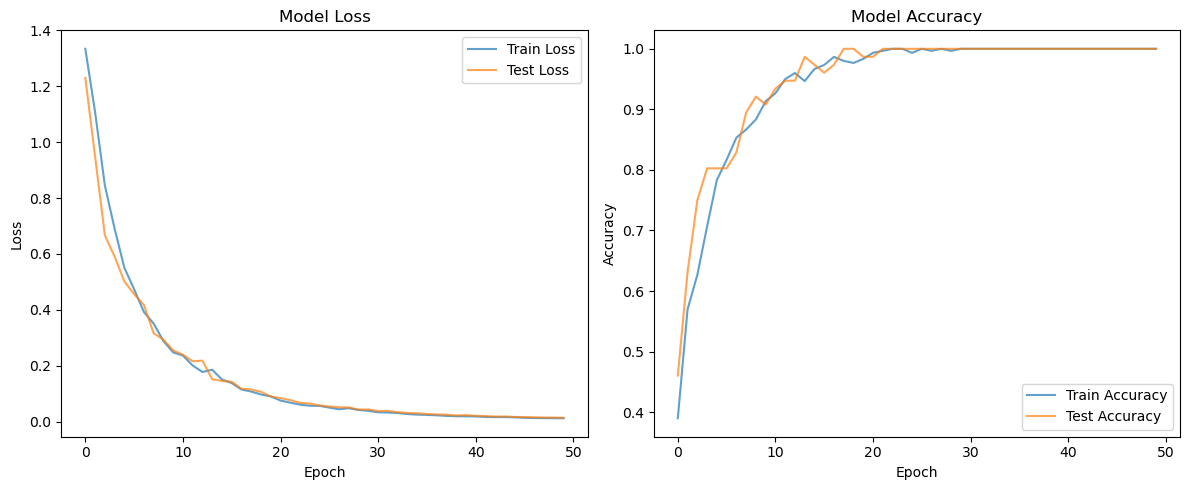

In [ ]:
plot_history(history_fft_cnn)

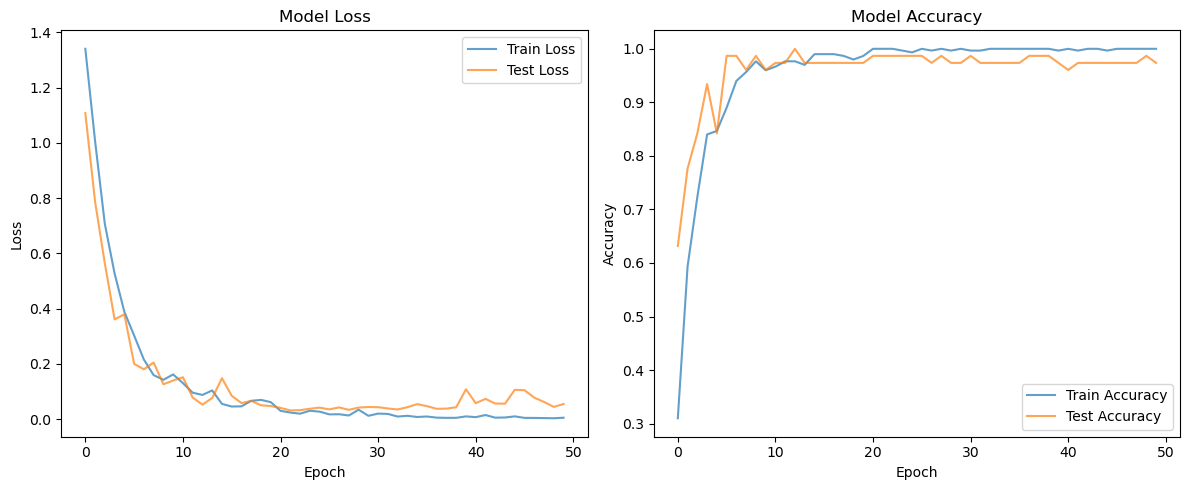

In [ ]:
plot_history(history_raw_cnn)

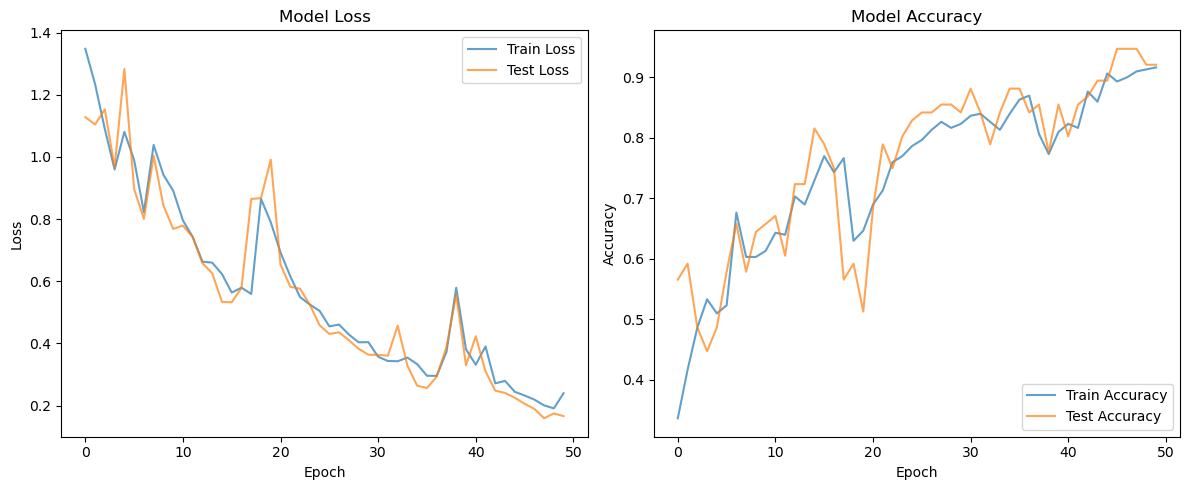

In [ ]:
plot_history(history_raw_lstm)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
def performance_matrix(model, X_test):
    # Predict the labels for the test set
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred_classes)

    # Plot the confusion matrix
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 1", "Class 2", "Class 3"], yticklabels=["Class 1", "Class 2", "Class 3"])
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

3/3 [==============================] - 0s 3ms/step


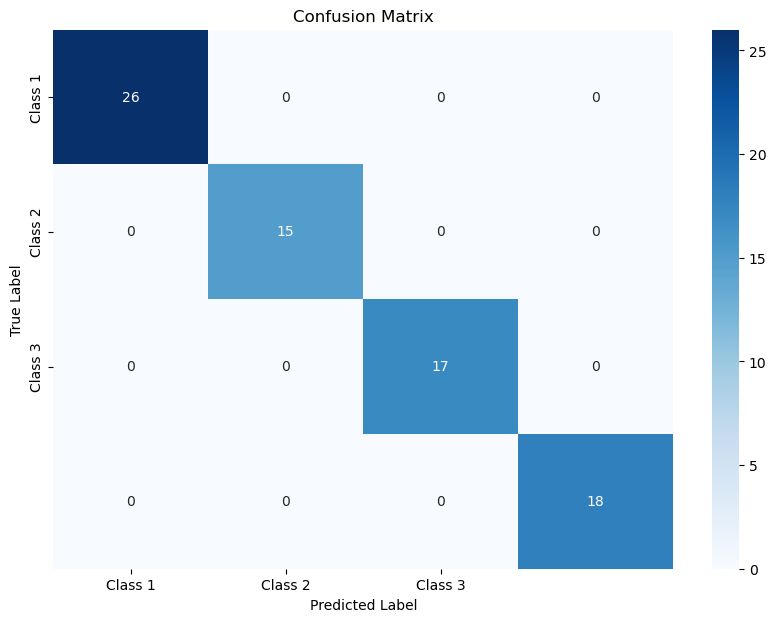

In [ ]:
performance_matrix(fft_cnn, X_test_fft)

3/3 [==============================] - 0s 4ms/step


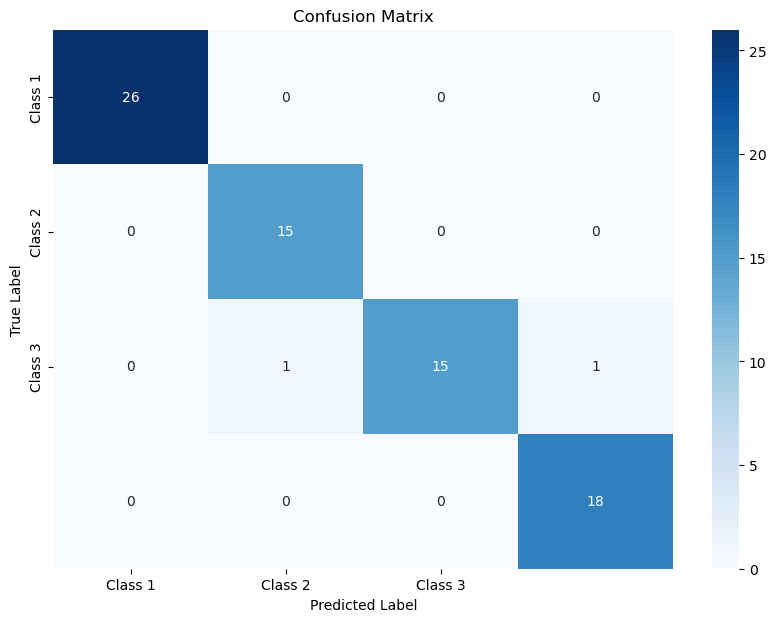

In [ ]:
performance_matrix(raw_cnn, X_test)

3/3 [==============================] - 1s 29ms/step


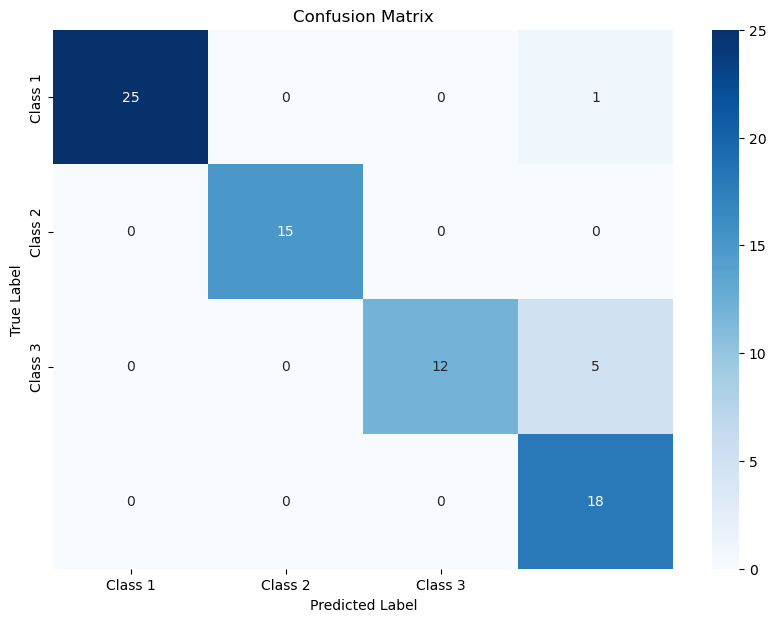

In [ ]:
performance_matrix(raw_lstm, X_test)